In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 讀取圖檔
img = cv2.imread('lena.bmp')
#img2 = cv2.imread('median_5x5.bmp')

In [3]:
def GetSaltAndPepper_Image(original_image, threshold = 0.1):
    result = original_image.copy()
    for r in range(original_image.shape[0]):
        for c in range(original_image.shape[1]):
            rv = np.random.uniform(0,1)
            if(rv <= threshold):
                result[r,c,:] = 0
            elif(rv > 1 - threshold):
                result[r,c,:] = 255
            else:
                result[r,c,:] = original_image[r,c,0]
    return result

In [4]:
def SNR(ori_img, noi_img):
    tmp1 = ori_img[:,:,0]/255
    tmp2 = noi_img[:,:,0]/255
    mu = np.sum(tmp1)/(512*512)
    vs = np.sum((tmp1-mu)**2)/(512*512)
    mu_noi = np.sum(tmp2 - tmp1)/(512*512)
    vn = np.sum((tmp2-tmp1-mu_noi)**2)/(512*512)
    return 20*np.log10(np.sqrt(vs)/np.sqrt(vn))

-2.136155191077323


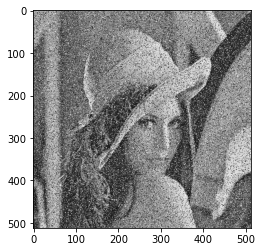

In [13]:
img_SAP01 = GetSaltAndPepper_Image(img)
print(SNR(img, img_SAP01))
plt.imshow(imgSAP.astype('uint8'))
plt.show()

In [14]:
def box_filter(ori_img, s):
    div = s * s
    bf_result = ori_img.copy()
    h = s//2
    for r in range(h,ori_img.shape[0] - h):
        for c in range(h,ori_img.shape[1] - h):
            #print(ori_img[r-h:r+h+1, c-h:c+h+1, 0].shape)
            bf_result[r, c, :] = np.sum(ori_img[r-h:r+h+1, c-h:c+h+1, 0])/div 
    return bf_result

In [15]:
def mid_filter(ori_img, s):
    div = s * s
    mf_result = ori_img.copy()
    h = s//2
    for r in range(h,ori_img.shape[0] - h):
        for c in range(h,ori_img.shape[1] - h):
            mf_result[r, c, :] = np.sort(ori_img[r-h:r+h+1, c-h:c+h+1, 0].reshape(div))[div//2]
    return mf_result

6.071817827655855


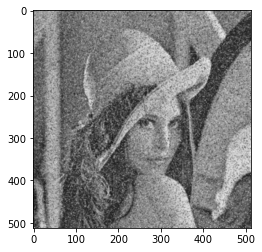

In [16]:
bf43 = box_filter(img_SAP01, 3)
print(SNR(img, bf43))
plt.imshow(bf43.astype('uint8'))
plt.show()

7.724778504465083


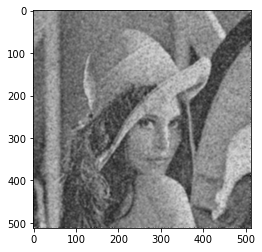

In [17]:
bf45 = box_filter(img_SAP01, 5)
print(SNR(img, bf45))
plt.imshow(bf45.astype('uint8'))
plt.show()

13.59076572425835


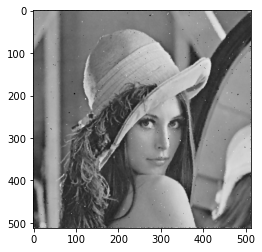

In [18]:
mf43 = mid_filter(img_SAP01, 3)
print(SNR(img, mf43))
plt.imshow(mf43.astype('uint8'))
plt.show()

12.794617996984767


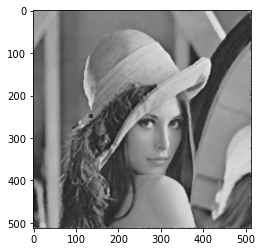

In [19]:
mf45 = mid_filter(img_SAP01, 5)
print(SNR(img, mf45))
plt.imshow(mf45.astype('uint8'))
plt.show()

In [21]:
def dilation(img,k): 
    img_pad = np.pad(array=img, pad_width=((3,3),(3,3),(0,0)), mode='constant', constant_values=0)
    img_tmp = np.zeros(img_pad.shape)
    for i in range(3,515): #3~514
        for j in range(3,515): #3~514
            a1 = max(img_pad[i-2,j-1:j+3,0])
            a2 = max(img_pad[i-1,j-2:j+3,0])
            a3 = max(img_pad[i,j-2:j+3,0])
            a4 = max(img_pad[i+1,j-2:j+3,0])
            a5 = max(img_pad[i+2,j-1:j+3,0])
            f  = max(img_pad[i,j:,0])
            f = 0
            img_tmp[i,j,0] = max(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,1] = max(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,2] = max(a1,a2,a3,a4,a5,f)
    return img_tmp[3:515,3:515]
def erosion(img,k): 
    img_pad = np.pad(array=img, pad_width=((3,3),(3,3),(0,0)), mode='constant', constant_values=255)
    img_tmp = np.zeros(img_pad.shape)
    for i in range(3,515): #3~514
        for j in range(3,515): #3~514
            a1 = min(img_pad[i-2,j-1:j+3,0])
            a2 = min(img_pad[i-1,j-2:j+3,0])
            a3 = min(img_pad[i,j-2:j+3,0])
            a4 = min(img_pad[i+1,j-2:j+3,0])
            a5 = min(img_pad[i+2,j-1:j+3,0])
            f  = min(img_pad[i,j:,0])
            f = 255
            img_tmp[i,j,0] = min(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,1] = min(a1,a2,a3,a4,a5,f)
            img_tmp[i,j,2] = min(a1,a2,a3,a4,a5,f)
    return img_tmp[3:515,3:515]
def opening(img,k):
    return dilation(erosion(img,k),k)
def closing(img,k):
    return erosion(dilation(img,k),k)

In [22]:
kernel = np.array([[0,255,255,255,0],[255,255,255,255,255],[255,255,255,255,255],[255,255,255,255,255],[0,255,255,255,0]])

-2.613521235094895


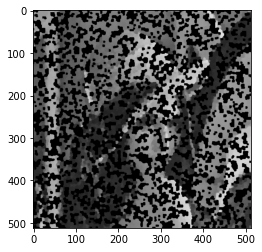

In [23]:
img_oc = closing(opening(img_SAP01,kernel),kernel)
print(SNR(img, img_oc))
plt.imshow(img_oc.astype('uint8'))
plt.show()

-2.9926327036693667


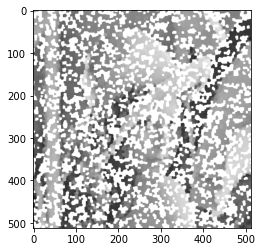

In [24]:
img_co = opening(closing(img_SAP01,kernel),kernel)
print(SNR(img, img_co))
plt.imshow(img_co.astype('uint8'))
plt.show()